In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

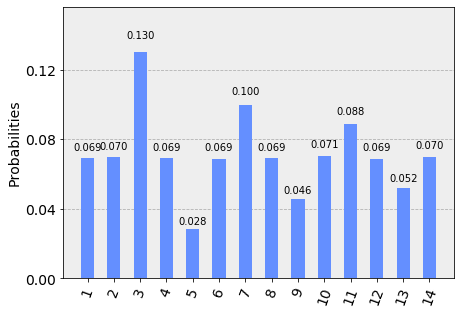

In [10]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,15):

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = np.pi # here we incorrectly choose theta=pi
    for j in range(n):
        qc.rz(theta/2*n,q[0])
        qc.rx(theta/n,q[0])
        qc.rz(theta/2*n,q[0])
        
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximatuon, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass
        
plot_histogram(error)